# Harmonic oscillator - Gauss–Legendre - GL4 implicit method implemention

The 1D equation of motion of pendulum is given by:

$$ \frac{d^2 x(t)}{dt^2} = \ddot{x}(t)= -k x(t)$$

decomposing into 1st order, coupled differential equation:

$$\dot{x} = v $$,
$$\dot{v} = -k x$$,

which are then solved numerically by implicit GL4 method with initial conditions:

$$x_1(t) \rightarrow x(0) = 1, \dot{x}(0) = 0$$

The implicit GL4 method is defined as (ref: https://en.wikipedia.org/wiki/Gauss%E2%80%93Legendre_method):

$$ y_{n+1} = y_n +\frac{1}{2}(k_1 + k_2) $$

where,

$$ k_1 = h f \left( t_n + h\left( \frac{1}{2} - \frac{\sqrt{3}}{6} \right) , y_n + \frac{1}{4} k_1 + \left( \frac{1}{4} - \frac{\sqrt{3}}{6}\right) k_2 \right) $$,

$$ k_2 = h f \left( t_n + h\left( \frac{1}{2} + \frac{\sqrt{3}}{6} \right) , y_n + \frac{1}{4} k_2 + \left( \frac{1}{4} + \frac{\sqrt{3}}{6}\right) k_1 \right)$$

Let $\gamma_+ = \left( \frac{1}{4} + \frac{\sqrt{3}}{6}\right)$ and $\gamma_- = \left( \frac{1}{4} - \frac{\sqrt{3}}{6}\right)$.

In [1]:
import numpy as np
import sympy as sp
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt

In [2]:
#Fourth order Gauss–Legendre method for solving
#coupled first order linear differential equation - Harmonic Oscillator

y1,y0,x1,x0,v1,v0,k,h = sp.symbols("y_{n+1} y_n x_{n+1} x_n v_{n+1} v_n k h")
k1,k2,gp,gm = sp.symbols("k_1 k_2 \gamma_+ \gamma_-")

def k1func(y0):
    return (-k1 + h*(y0 + k1/4 + gm*k2))

def k2func(y0):
    return (-k2 + h*(y0 + gp*k1 + k2/4))

def dxdt_RHS():
    dxdt = v0
    return dxdt

def dvdt_RHS():
    dvdt = -k*x0
    return dvdt

k1x_eq = sp.linsolve([k1func(dxdt_RHS()),k2func(dxdt_RHS())],(k1,k2)).args[0][0]
k2x_eq = sp.linsolve([k1func(dxdt_RHS()),k2func(dxdt_RHS())],(k1,k2)).args[0][1]
k1v_eq = sp.linsolve([k1func(dvdt_RHS()),k2func(dvdt_RHS())],(k1,k2)).args[0][0]
k2v_eq = sp.linsolve([k1func(dvdt_RHS()),k2func(dvdt_RHS())],(k1,k2)).args[0][1]
k1x = lambdify([x0,v0,gm,gp,k,h],k1x_eq)
k2x = lambdify([x0,v0,gm,gp,k,h],k2x_eq)
k1v = lambdify([x0,v0,gm,gp,k,h],k1v_eq)
k2v = lambdify([x0,v0,gm,gp,k,h],k2v_eq)

In [3]:
#Explicit RK2 method

def RHS(x,v):
    xdot=v
    vdot=-km*x
    return (xdot,vdot)

def RK4(x,v,h):
    k1x, k1v = RHS(x,v)
    k2x, k2v = RHS(x+h/2*k1x, v+h/2*k1v)
    k3x, k3v = RHS(x+h/2*k2x, v+h/2*k2v)
    k4x, k4v = RHS(x+h*k3x, v+h*k3v)
    xn = x + h/6*(k1x+2*k2x+2*k3x+k4x)
    vn = v + h/6*(k1v+2*k2v+2*k3v+k4v)
    return xn, vn

In [4]:
h = 0.1  # step size
t = np.arange(0,30,h) # (initial time, final time + 1, time step size)
x_e = np.zeros(len(t))
v_e = np.zeros(len(t))
x = np.zeros(len(t))
v = np.zeros(len(t))
x[0] = 1 # initial position x(t)=x(0)=1
v[0] = 0 # initial velocity
x_e[0] = 1 # initial position x(t)=x(0)=1
v_e[0] = 0 # initial velocity
km = 1 #spring constant
gamma_plus = 1/4 + np.sqrt(3)/6
gamma_minus = 1/4 - np.sqrt(3)/6

for i in range (len(t)-1):
    x_e[i+1],v_e[i+1] = RK4(x_e[i],v_e[i],h)
    x[i+1] = x[i] + (1/2)*( k1x(x[i],v[i],gamma_minus,gamma_plus,km,h) 
                           + k2x(x[i],v[i],gamma_minus,gamma_plus,km,h) )
    v[i+1] = v[i] + (1/2)*( k1v(x[i],v[i],gamma_minus,gamma_plus,km,h) 
                           + k2v(x[i],v[i],gamma_minus,gamma_plus,km,h) )

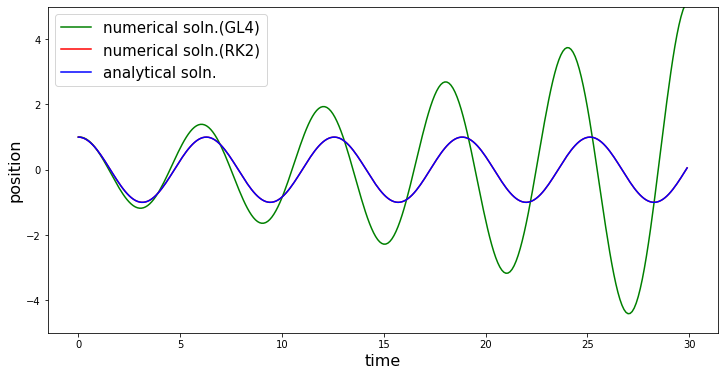

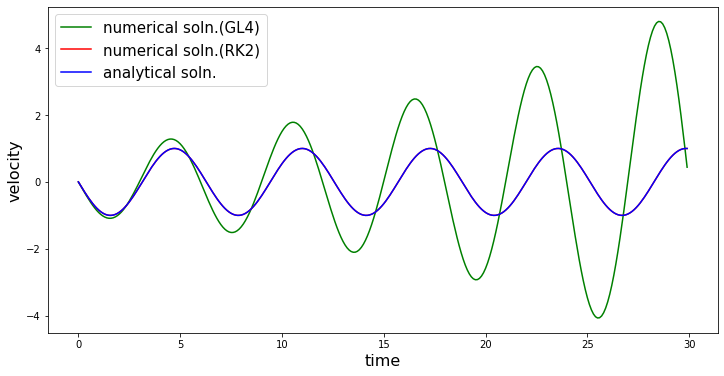

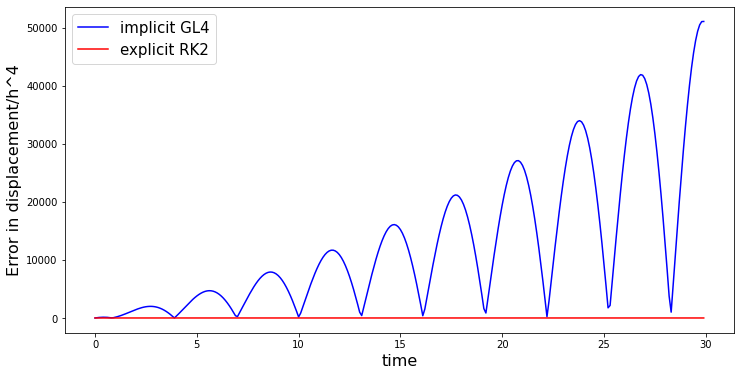

In [5]:
# Analytic solution: x = A*cos(w*t) + B*sin(w*t)
# with inital conditions x(t)=x(0)=1 and v(t)=v(0)=0:
A = 1 
B = 0
w = np.sqrt(km) # angular velocity

# Calculating analytical solution for array of time - t:
x_a = A*np.cos(w*t) + B*np.sin(w*t)
v_a = -A*np.sin(w*t) + B*np.cos(w*t)

#plot numerical and analytical solutions - position/displacement:
plt.figure(figsize=(12,6))
plt.ylim(-5,5)
plt.xlabel("time",fontsize=16)
plt.ylabel("position",fontsize=16)
plt.plot(t,x,color ='green')
plt.plot(t,x_e,color ='red')
plt.plot(t,x_a,color ='blue')
plt.legend(["numerical soln.(GL4)","numerical soln.(RK2)","analytical soln."],fontsize=15)
plt.show()

#plot numerical and analytical solutions - velocity:
plt.figure(figsize=(12,6))
plt.xlabel("time",fontsize=16)
plt.ylabel("velocity",fontsize=16)
plt.plot(t,v,color ='green')
plt.plot(t,v_e,color ='red')
plt.plot(t,v_a,color ='blue')
plt.legend(["numerical soln.(GL4)","numerical soln.(RK2)","analytical soln."],fontsize=15)
plt.show()

#Error calculation:
delX = np.abs((x - x_a)/h**4)
delX_e = np.abs((x_e - x_a)/h**4)

plt.figure(figsize=(12,6))
plt.xlabel("time",fontsize=16)
plt.ylabel("Error in displacement/h^4",fontsize=16)
plt.plot(t,delX,color ='blue')
plt.plot(t,delX_e,color ='red')
plt.legend(["implicit GL4","explicit RK2"],fontsize=15)
plt.show()